# Using dictionaries and lists to explore social networks

If this is your first time programming this first homework might seem hard since you are learning so many basic skills --- **but don't panic!**  We will go through the start of this assignment in class, and to get maximum help you should fully utilize the Blackboard discussion forum, office hours, and the informal recitation.  

Working in a group is fine --- <a href="https://www.agilealliance.org/glossary/pairing" target="_blank">pair programming</a> is a thing. However, please submit independent answers to questions instead of verbatim copying each others content. 

***Summary:*** To practice using Python data structures we will use some simple approaches to represent and explore a social network.  Of course computing with such networks is big business, so there's lots of professional-quality software out there to compute with networks and graphs --- when doing your research you will use such tools.  However, the objective here is to practice lists, dictionaries, algorithms, for loops, Python builtins, and coding, so we will write some simple software ourselves.

We have a class of 50 people and we want to
* easily check if someone is in the class or not
* easily look up someone's nationality
* count the number of each nationality
* make some fake data to test our software
* count the number of friends each person has
* compute statistics (min/max/mean/median) on the number of friends
  - in total, and
  - by nationality (American or international)
* determine how many handshakes each person is away from knowing Robert
* print out the results in an organized and readable manner


First, **execute** the following cell to define a list named `members` containing the names of all class members.

In [1]:
members = ["Arnetta","Thomasena","Tammera","Chen","Lorene","Ajinder","Wen","Carletta","Mathew","Kum","Preston","Charlene","Wilson","Kathryne","Ariel","Shawn","Mei","Coralie","Kenna","Robert","Bethel","Marc","Ferdinand","Rico","Anne","Inderjeet","Tamiko","Dominque","Dian","Loraine","Sharen","Onie","Temeka","Ceola","Cherly","Samual","Leeanne","Rosamond","Arianna","Calandra","Panav","Jenelle","Luisa","Desiree","Krista","Sun","Angella","Estela","Gudrun","Maryrose"];
print(members)

['Arnetta', 'Thomasena', 'Tammera', 'Chen', 'Lorene', 'Ajinder', 'Wen', 'Carletta', 'Mathew', 'Kum', 'Preston', 'Charlene', 'Wilson', 'Kathryne', 'Ariel', 'Shawn', 'Mei', 'Coralie', 'Kenna', 'Robert', 'Bethel', 'Marc', 'Ferdinand', 'Rico', 'Anne', 'Inderjeet', 'Tamiko', 'Dominque', 'Dian', 'Loraine', 'Sharen', 'Onie', 'Temeka', 'Ceola', 'Cherly', 'Samual', 'Leeanne', 'Rosamond', 'Arianna', 'Calandra', 'Panav', 'Jenelle', 'Luisa', 'Desiree', 'Krista', 'Sun', 'Angella', 'Estela', 'Gudrun', 'Maryrose']


### Problem 1a
Write a one-line Python test to print if there is someone called "Luisa" is in the class or not.  

What about "Mark" ?

Verify your code is producing the correct answers by looking at the list.

In [2]:
print('Luisa' if 'Luisa' in members else 'No Luisa')
# 'Mark' in members
print('Mark' if 'Mark' in members else 'No Mark')

Luisa
No Mark


### Problem 1b
Write short piece of Python to print the number of times the name "Gudrun" appears in the list of class members.

In [3]:
count = 0
for member in members:
    if member =='Gudrun':
        count += 1
print('Number of times:', count)

Number of times: 1


In [4]:
print(members.count('Gudrun'))

1


### Problem 2

For this project it is important that each name is unique.

Verify that no name is repeated in `members` by writing some code that prints `"Seems OK"` if no name is repeated, or prints out a name if it is repeated.

(Hint: can you use your answer to Q1 a or b as a building block?)

You can test your code actually detects repeats by introducing a repeated name --- ***Don't forget to remove the repeated entry before proceeding with the next steps***

In [5]:
name_list = []
no_repeated = True
for name in members:
    if name not in name_list:
        name_list.append(name)
    else:
        print('Repeated name:', name)
        no_repeated = False
if no_repeated:
    print('Seems OK')


Seems OK


**Execute** the following cell to define the list of nationalities (A=American, I=International) of everyone in the class.

In [6]:
nationalities = ['A','A', 'A', 'I', 'I', 'I', 'I', 'I', 'A', 'I', 'A', 'A', 'A', 'A', 'I', 'A', 'I', 'I', 'A', 'I', 'A', 'A', 'I', 'I', 'I', 'I', 'A', 'I', 'I', 'I', 'I', 'A', 'A', 'A', 'I', 'A', 'A', 'I', 'A', 'A', 'I', 'A', 'I', 'A', 'A', 'I', 'A', 'A', 'A', 'A']

### Problem 3

Perform basic sanity tests
* verify the lists of members and nationalities are the same length, and 
* verify the nationalities are only either "A" or "I" (anything else is an error which should be reported)

Again, test your code by inserting an incorrect nationality into the list (and don't forget to remove it before proceeding).

In [7]:
print('The same length' if len(members) == len(nationalities) else 'Different length')
for ch in nationalities:
    if ch != 'A' and ch != 'I':
        print('Error')
        break
else:
    print('Only A or I exists')

The same length
Only A or I exists


### Problem 4

What are the number of Americans and International students in the class? 

In [8]:
Americans = 0
International_students = 0
for student in nationalities:
    if student == 'A':
        Americans += 1
    elif student == 'I':
        International_students += 1
print('The number of Americans:', Americans)
print('The number of International students:', International_students)

The number of Americans: 27
The number of International students: 23


### Problem 5

Write some code to print the nationality of "Bethel".

Hint: look again at documentation for the sequence member functions.

In [9]:
position = members.index('Bethel')
print(position, members[position], nationalities[position])

20 Bethel A


Mmmm ... that was a little clunky and not intuitive, and if we had 1 million people probably very slow. Let's find a better way to lookup the nationality.

We want to associate each person with a nationality.  This is what a dictionary (also called an associative array or a map) does.

### Problem 6

Make a dictionary named `nationality` that maps from names to nationalities.  I.e., so that
```
nationality[name]
```
would look up the nationality associated with `name`.

There's lots of ways to do this - try to come up with at least two.  Can U do it in 1 line of code?  Can you do it with no loops?  Note that readable code is always better than hard to understand shorter code, and working code is definitely better than no code at all!

If you have multiple solutions, verify they give the same results.

In [10]:
nationality = {}
index = 0
# print(members)
for mem in members:
    nationality[mem] = nationalities[index]
    index += 1
print(nationality)

{'Arnetta': 'A', 'Thomasena': 'A', 'Tammera': 'A', 'Chen': 'I', 'Lorene': 'I', 'Ajinder': 'I', 'Wen': 'I', 'Carletta': 'I', 'Mathew': 'A', 'Kum': 'I', 'Preston': 'A', 'Charlene': 'A', 'Wilson': 'A', 'Kathryne': 'A', 'Ariel': 'I', 'Shawn': 'A', 'Mei': 'I', 'Coralie': 'I', 'Kenna': 'A', 'Robert': 'I', 'Bethel': 'A', 'Marc': 'A', 'Ferdinand': 'I', 'Rico': 'I', 'Anne': 'I', 'Inderjeet': 'I', 'Tamiko': 'A', 'Dominque': 'I', 'Dian': 'I', 'Loraine': 'I', 'Sharen': 'I', 'Onie': 'A', 'Temeka': 'A', 'Ceola': 'A', 'Cherly': 'I', 'Samual': 'A', 'Leeanne': 'A', 'Rosamond': 'I', 'Arianna': 'A', 'Calandra': 'A', 'Panav': 'I', 'Jenelle': 'A', 'Luisa': 'I', 'Desiree': 'A', 'Krista': 'A', 'Sun': 'I', 'Angella': 'A', 'Estela': 'A', 'Gudrun': 'A', 'Maryrose': 'A'}


In [11]:
nationality = {}
for index, member in enumerate(members):
    nationality[member] = nationalities[index]
print(nationality)map

SyntaxError: invalid syntax (Temp/ipykernel_9840/2942726470.py, line 4)

In [ ]:
nationality = {}
for member, nation in zip(members, nationalities):
    nationality[member] = nation
print(nationality)

In [ ]:
nationality = dict(zip(members, nationalities)) # Contain key and value
print(nationality)

Test it by looking up the nationality of a few names.  Are you getting the right answers?

### Problem 7
Make and print out a list with the names of all the American students and a separate list for all the international students

In [27]:
A_list = []
I_list = []
for name, nation in nationality.items():
    if nation == 'A':
        A_list.append(name)
    elif nation == 'I':
        I_list.append(name)
print('American students:', A_list)
print('---------------------------------------------------------------------------------')
print('International students:', I_list)

American students: ['Arnetta', 'Thomasena', 'Tammera', 'Mathew', 'Preston', 'Charlene', 'Wilson', 'Kathryne', 'Shawn', 'Kenna', 'Bethel', 'Marc', 'Tamiko', 'Onie', 'Temeka', 'Ceola', 'Samual', 'Leeanne', 'Arianna', 'Calandra', 'Jenelle', 'Desiree', 'Krista', 'Angella', 'Estela', 'Gudrun', 'Maryrose']
---------------------------------------------------------------------------------
International students: ['Chen', 'Lorene', 'Ajinder', 'Wen', 'Carletta', 'Kum', 'Ariel', 'Mei', 'Coralie', 'Robert', 'Ferdinand', 'Rico', 'Anne', 'Inderjeet', 'Dominque', 'Dian', 'Loraine', 'Sharen', 'Cherly', 'Rosamond', 'Panav', 'Luisa', 'Sun']


### Problem 8
Above you computed the number of American and international students - demonstrate that your lists of names each have the correct length

In [ ]:
print('Correct length' if len(A_list) == Americans else 'Incorrect length')
print('Correct length' if len(I_list) == International_students else 'Incorrect length')

"Violette" tells us that her friends are "Arianna", "Calandra"," Stacie", and "Jenelle".  We could store this in a list and assign it to a variable like this
```
violettes_friends = ["Arianna","Calandra","Stacie","Jenelle"]
```
But we have 50 (and in real life more) people to keep track of --- it is just too cumbersome to have a variable for each person.  

I.e., we want to associate each person by name with a list of friends.  

Sound familiar?  We need another dictionary, just like we did for nationalities.  I.e., we need a dictionary so that doing `members_friends[name]` gives us a list of friends for the person.

If we had some actual data we would read from a file or data base the list of friends for each person.  In this class we will instead generate some random test data. 

This is very common when developing code and testing algorithms.

The test data must make sense and not be too large.  The following seem a good set of contraints for our tests in class.  
* we randomly pick friends (aboput 6 or fewer) for each person
* a person's list of friends should not include her/himself, and should not include repeats
* the friend relationship should be reciprocal --- i.e., if I am friends with you, then you are with me.
 
The code below generates the test data.  Read it to understand what **each** line is doing.  If you cannot figure it out, then ask!

In [12]:
import random
random.seed(1)   # So that rerunning this code produces same result every time

members_friends={}   # make an empty dictionary
for name in members: # pre-populate with empty list for each person
    members_friends[name]=[]
    
for member in members:
    nfriends = random.randrange(0,6) # random integer 0<=N<6
    while len(members_friends[member]) < nfriends:
        # find a *new* friend who is not member
        while True:
            friend = members[random.randrange(0,len(members))]
            if not (friend in members_friends[member] or friend==member):
                break
        members_friends[member].append(friend)
        members_friends[friend].append(member) # Ensure reciprocal relationshipmales

#print(members_friends)  # this works but is hard to read
for member, friends in members_friends.items():
    print(member,":",friends)

Arnetta : ['Leeanne', 'Wen', 'Kum', 'Cherly', 'Calandra']
Thomasena : ['Ajinder', 'Mathew', 'Preston', 'Shawn']
Tammera : ['Carletta', 'Onie', 'Marc', 'Sharen']
Chen : ['Sharen', 'Jenelle', 'Anne', 'Krista']
Lorene : ['Wen']
Ajinder : ['Thomasena', 'Anne', 'Dominque']
Wen : ['Lorene', 'Gudrun', 'Maryrose', 'Arnetta', 'Mathew', 'Mei', 'Inderjeet']
Carletta : ['Tammera', 'Dian', 'Coralie', 'Angella', 'Ariel']
Mathew : ['Wen', 'Bethel', 'Thomasena', 'Jenelle']
Kum : ['Arnetta', 'Anne', 'Desiree', 'Kathryne']
Preston : ['Angella', 'Thomasena', 'Ceola']
Charlene : ['Gudrun', 'Mei', 'Ferdinand']
Wilson : ['Onie', 'Samual', 'Ariel', 'Kenna']
Kathryne : ['Kum', 'Ariel']
Ariel : ['Carletta', 'Wilson', 'Kathryne', 'Gudrun', 'Loraine', 'Leeanne']
Shawn : ['Thomasena', 'Tamiko', 'Marc']
Mei : ['Jenelle', 'Wen', 'Charlene', 'Panav']
Coralie : ['Carletta', 'Kenna', 'Estela', 'Marc', 'Angella', 'Arianna']
Kenna : ['Coralie', 'Temeka', 'Dominque', 'Luisa', 'Wilson', 'Robert']
Robert : ['Kenna', 'Rosam

Cool.  Now let's do some data analytics!  Manually verify your answers --- this is only a small social network.

### Problem 9

* make a list called `members_num_friends` that contains the number of friends each person has
* what is the maximum number of friends anyone has?
* what is the least?
* who has exactly two friends?
* who has the most friends?
* who has the least?


In [20]:
members_num_friends = []
max_num = 0
min_num = len(members_friends)
two_friends = []
most_friends = []
least_friends = []

for name in members_friends:
    members_num_friends.append(len(members_friends[name]))
    if len(members_friends[name]) > max_num:
        max_num = len(members_friends[name])
    elif len(members_friends[name]) < min_num:
        min_num = len(members_friends[name])
    if len(members_friends[name]) == 2:
        two_friends.append(name)
print('The number of friends each person has:', members_num_friends)
print('The maximum number of friends:', max_num)
print('The least number of friends:', min_num)
print('Person has exactly two friends:', two_friends)

for name in members_friends:
    if len(members_friends[name]) == max_num:
        most_friends.append(name)
    elif len(members_friends[name]) == min_num:
        least_friends.append(name)
print('Person has the most friends:', most_friends)
print('Person has the least friends:', least_friends)

The number of friends each person has: [5, 4, 4, 4, 1, 3, 7, 5, 4, 4, 3, 3, 4, 2, 6, 3, 4, 6, 6, 2, 3, 4, 6, 6, 5, 8, 3, 4, 3, 2, 4, 3, 7, 4, 1, 5, 6, 4, 3, 5, 3, 4, 4, 2, 3, 2, 5, 4, 3, 4]
The maximum number of friends: 8
The least number of friends: 1
Person has exactly two friends: ['Kathryne', 'Robert', 'Loraine', 'Desiree', 'Sun']
Person has the most friends: ['Inderjeet']
Person has the least friends: ['Lorene', 'Cherly']


### Problem 10

Here are functions to compute the mean of a list of numbers.

Ditto for the median (see basic procedure in https://en.wikipedia.org/wiki/Median).

Test them both on the three lists below for which you can compute the answers by hand
```
l1 = [3,1,2,4]
l2 = [3,1,2,4,0]
l3 = []
```

In [21]:
def compute_mean(values):
    '''Given a list (iterable) of values, return the mean.'''
    if len(values) == 0:
        return 0.0
    else:
        return sum(values)/len(values)

def compute_median(values):
    '''Given a list (iterable) of values, return the median.'''
    s = sorted(values)
    n = len(s)
    if n == 0:
        return 0.0
    elif n%2 == 1:
        return s[(n-1)//2]
    else:
        return 0.5*(s[n//2]+s[n//2 - 1])

l1 = [3,1,2,4]
l2 = [3,1,2,4,0]
l3 = []


In [23]:
# Insert your test code below here
print('l1 mean:', compute_mean(l1))
print('l2 mean:', compute_mean(l2))
print('l3 mean:', compute_mean(l3))
print('l1 median:', compute_median(l1))
print('l2 median:', compute_median(l2))
print('l3 median:', compute_median(l3))

l1 mean: 2.5
l2 mean: 2.0
l3 mean: 0.0
l1 median: 2.5
l2 median: 2
l3 median: 0.0


Great.  Now we can compute statistics (min/max/mean/median) on the number of friends people have
* in total, and
* by nationality

How to do this?  We already have a list of the number of total friends for each person, and we also have functions to compute all the stats we need.  So we just need to make a list (e.g., call it `members_num_american_friends`) for the number of American friends each person has (and ditto for international friends) and then apply the functions we already have to each list.

### Problem 11

Please print out the statistics with everything lined up nicely in columns with titles and all numbers printed with 1 decimal place.  I.e., something like this (your numbers will be different and you don't have to precisely reproduce the layout --- the goal is readability).

```
                    max      min     mean   median
                 -------- -------- -------- --------
        total:      8.0      1.0      4.0      4.0 
     american:      7.0      1.0      3.3      3.0 
international:      3.0      0.0      0.7      1.0 
```

It may help to look at string formatting documentation:
* https://docs.python.org/3.6/tutorial/inputoutput.html#fancier-output-formatting
* https://docs.python.org/3.6/library/stdtypes.html#text-sequence-type-str

Do your numbers make sense?  Ask critical questions about **every** result because it is so easy to make mistakes.

In [71]:
a_max_num = 0
a_min_num = len(members_friends)
i_max_num = 0
i_min_num = len(members_friends)
a_num_list = []
i_num_list = []

# print(A_list)
for name in A_list:
    a_num_list.append(len(members_friends[name]))
    if len(members_friends[name]) > a_max_num:
        a_max_num = len(members_friends[name])
    elif len(members_friends[name]) < a_min_num:
        a_min_num = len(members_friends[name])
# print(a_num_list)
        
# print(I_list)
for name in I_list:
    i_num_list.append(len(members_friends[name]))
    if len(members_friends[name]) > i_max_num:
        i_max_num = len(members_friends[name])
    elif len(members_friends[name]) < i_min_num:
        i_min_num = len(members_friends[name])
# print(i_num_list)

print('                    max      min      mean    median')
print('                 -------- -------- -------- --------')
print('        total:      ', end='')
print('{0:.1f}      {1:.1f}       {2:.1f}      {3:.1f}'.format(max_num, min_num, compute_mean(members_num_friends), compute_median(members_num_friends)))
print('     american:      ', end='')
print('{0:.1f}      {1:.1f}       {2:.1f}      {3:.1f}'.format(a_max_num, a_min_num, compute_mean(a_num_list), compute_median(a_num_list)))
print('international:      ', end='')
print('{0:.1f}      {1:.1f}       {2:.1f}      {3:.1f}'.format(i_max_num, i_min_num, compute_mean(i_num_list), compute_median(i_num_list)))

                    max      min      mean    median
                 -------- -------- -------- --------
        total:      8.0      1.0       4.0      4.0
     american:      7.0      2.0       3.9      4.0
international:      8.0      1.0       4.1      4.0


### Our final challenge is to compute the distance (number of of handshakes) everyone is away from Robert. 

 **There's no points for this section --- just read it.**
 
This part is a bit more complicated and is really for those who already have a bit of programming experience. I don't expect everyone to fully understand this at this stage.  So, unless you want some extra fun there's no actual coding in this question.

In the following we discuss how to design an algorithm to compute the distances.  You may want to think about this for yourself first.

What do we know already?
* Robert is zero distance from himself
* His friends are one unit (handshake) distance away
* What about the friends of Robert's friends?  
  - As we loop thru these lists of friends, there seems to be three scenarios
    - a person is Robert and so the distance is zero
    - a person is a friend of Robert and so the distance is one
    - otherwise the person is two handshakes away (friend of a friend of Robert)

What also often helps is to think of a simpler problem you can solve.  In this instance, if you were not already a friend of Robert and were magically given the distance of all of your friends from him, how could you compute your distance?
* It is one greater than the minimum distance for any of your friends.  Does that make sense?
 
So now we have the two elements we need for an algorithm
* By spiraling out (friends of Robert, friends of friends of Robert, etc.), we will discover people in order of increasing distance.  As a result, when we look in turn at the friends of each person we will either 
  - already know the distance from Robert of the friend (since that person is closer to Robert), or 
  - don't already know the distance from Robert of the friend, in which case the person is as far or further away than the person we are interested in.
* Hence we can compute the distance for the person as one greater than the the minimum distance of all friends for which we already know the distance.
  
This is the essence of Dijkstra's famous algorithm for solving this problem
* https://en.wikipedia.org/wiki/Dijkstra's_algorithm
* https://en.wikipedia.org/wiki/Shortest_path_problem

We have not been concerned with efficiency, instead we just wanted to explore programming and algorithms.  However, if you have a big social network efficiency becomes very important, and the above two links are a good place to start reading.

For most everyone:
* read and understand my implementation of Dijkstra's algorithm below
* ask questions in class (or office hours or on the discussion board) if you don't understand

For people up for a challenge:
* try writing your own software for computing the distance of everyone from Robert, or
* translate into Python Dijkstra's algorithm from the pseudocode given on the Wikipedia page above.

Either way, run your code or my code to compute a dictionary (called `distances`) that maps from a name to the distance from Robert.


In [24]:
def compute_distance_from_target(target, members, members_friends):
    ''' 
    Returns a map from each member to his/her distance from the target person.
    If someone is not connected, the distance will be >= the number of members
    '''
    unprocessed=list(members)
    dist={member:len(members) for member in members}
    dist[target] = 0
    
    while len(unprocessed) > 0:
        mindist = len(members)
        for q in unprocessed:
            if dist[q] <= mindist:
                mindist = dist[q]
                u = q
        unprocessed.remove(u)
        
        for v in members_friends[u]:
            dist[v] = min(dist[v],dist[u]+1)
            
    return dist

distances = compute_distance_from_target("Robert", members, members_friends)

#print(distances)
# again, print a more readable format
for name, distance in distances.items():
    print(name,":",distance)

Arnetta : 3
Thomasena : 4
Tammera : 4
Chen : 5
Lorene : 5
Ajinder : 3
Wen : 4
Carletta : 3
Mathew : 4
Kum : 4
Preston : 4
Charlene : 3
Wilson : 2
Kathryne : 4
Ariel : 3
Shawn : 4
Mei : 4
Coralie : 2
Kenna : 1
Robert : 0
Bethel : 3
Marc : 3
Ferdinand : 2
Rico : 3
Anne : 4
Inderjeet : 3
Tamiko : 3
Dominque : 2
Dian : 4
Loraine : 4
Sharen : 4
Onie : 3
Temeka : 2
Ceola : 3
Cherly : 4
Samual : 3
Leeanne : 2
Rosamond : 1
Arianna : 3
Calandra : 3
Panav : 3
Jenelle : 4
Luisa : 2
Desiree : 4
Krista : 4
Sun : 3
Angella : 3
Estela : 3
Gudrun : 4
Maryrose : 3


### What does the graph look like?

To wrap up, and provide a hint of what is ahead for you - run the following to see what our little social network looks like.  You don't need to understand this code.

I followed http://lachlanblackhall.com/wp-content/uploads/2014/08/Graphs-Networks-and-Python.pdf and https://networkx.github.io/documentation/stable/index.html 

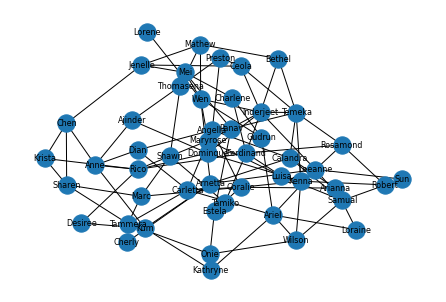

In [25]:
import networkx as nx
%matplotlib inline
G = nx.Graph()
for name in members:
    G.add_node(name)
for name in members:
    for friend in members_friends[name]:
        if name > friend:
            G.add_edge(name,friend)
labels={name:name for name in members}
nx.draw(G,labels=labels,font_size=8)